# Urban and Rural Student Performance

>Parents' perspective


- toc:false
- branch: master
- badges: true
- comments: true
- author: Evgeny Khoroshukhin
- categories: [jupyter]
- image: images/student-performance.jpg

For my 
this is students performance data set that can be found [here](https://archive-beta.ics.uci.edu/ml/datasets/student+performance)

In [140]:
#hide
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
#hide_input
df=pd.read_csv('/content/drive/MyDrive/DS_data/student-mat.csv',sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


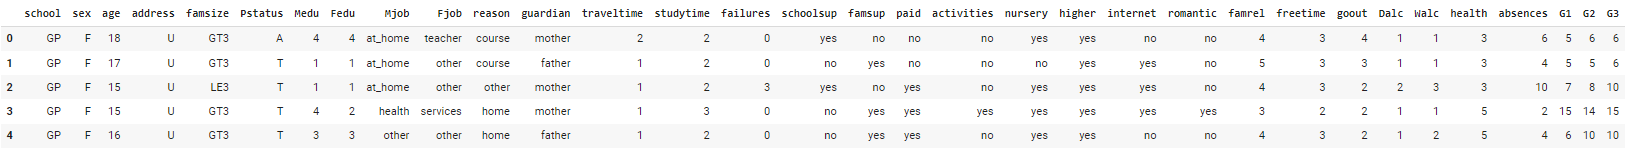

Although there's a lot to explore in this dataset like what factors impact student performance.
Main focus was to see the differences between Urban and Rural areas but more from the parents' perspective.
At the end I chose these variables to analyze:


here's data dictionary:

- sex - student's sex (binary: "F" - female or "M" - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: "U" - urban or "R" - rural)
- famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
- Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- famsup - family educational support (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

# Data Wrangling
___

First thing I've done after exploring the data was subsetting the dataframe with necessary varibles. 

The limitation of this data set is quite obviuous. 
Mainly this dataset was dedicated students, therefore there's not really a lot of info about parents.




In [142]:
#calc average score

df['avg_score']=((df['G1']+df['G2']+df['G3'])/3).round(2)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.67
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.33
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.33
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.67
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,9.00
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,15.33
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,8.33
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,11.00


In [143]:
#hide
df=df.drop(['school','Dalc','Walc','G1','G2','G3','romantic','nursery','schoolsup','famsup','paid','G1','G2','G3'],axis=1)
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,activities,higher,internet,famrel,freetime,goout,health,absences,avg_score
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,no,yes,no,4,3,4,3,6,5.67
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,yes,5,3,3,3,4,5.33
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,no,yes,yes,4,3,2,3,10,8.33
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,yes,yes,yes,3,2,2,5,2,14.67
4,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,4,3,2,5,4,8.67


After doing a quick value counts  it's clear that the samples for Urban area and Rural area do not have the same ratio. Urban being about x2.5 bigger. That may skew the sample representation.

In [102]:
df['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

In [144]:
df=df.convert_dtypes()

In [145]:
#collapse_output
df.groupby( ['address','age','sex']).sum()

Medu  Fedu  traveltime  ...  health  absences  avg_score
address age sex                          ...                             
R       15  F      20    22          14  ...      33        38      87.66
            M      18    17          13  ...      20        22      56.33
        16  F       9     9           4  ...      11        12      30.00
            M      26    22          15  ...      30        45      98.33
        17  F      37    34          24  ...      47        95     147.00
            M      24    27          26  ...      45        52     114.00
        18  F      36    35          32  ...      53       131     134.67
            M      33    29          24  ...      50        77     137.00
        19  F       7     7           3  ...      13        52      29.00
            M       6     6           9  ...      17        12      32.34
        21  M       1     1           1  ...       3         3       8.33
U       15  F      86    76          37  ...     100       110     284.67
            M     125   111          48  ...     141       104     496.68
        16  F     140   129          68  ...     176       306     536.30
            M     119   108          59  ...     168       204     484.64
        17  F     116   110          54  ...     143       306     480.65
            M      79    71          39  ...     108       180     292.33
        18  F      77    72          39  ...      88       130     297.98
            M      76    67          35  ...      91       158     261.34
        19  F      23    21          16  ...      33       109     105.00
            M      16    15           7  ...      21        78      55.34
        20  F       4     2           2  ...       3         4      14.67
            M       5     4           2  ...       9        11      26.67
        22  M       3     1           1  ...       1        16       7.33

[24 rows x 11 columns]

In [156]:
#collapse_output
urban_single_parents_st_avg=df[(df['address']=='U') & (df['Pstatus']=='A')].groupby(['age'])['avg_score'].mean().round(2)
urban_parents_st_avg=df[(df['address']=='U') & (df['Pstatus']=='T')].groupby(['age'])['avg_score'].mean().round(2)
rural_single_parents_st_avg=df[(df['address']=='R') & (df['Pstatus']=='A')].groupby(['age'])['avg_score'].mean().round(2)
rural_parents_st_avg=df[(df['address']=='R') & (df['Pstatus']=='T')].groupby(['age'])['avg_score'].mean().round(2)

stu=pd.concat((urban_single_parents_st_avg, urban_parents_st_avg,rural_single_parents_st_avg,rural_parents_st_avg),axis=1)
stu.columns=['U_single_parents_st_avg', 'U_parents_st_avg','R_single_parents_st_avg','R_parents_st_avg']
stu.index.name='age'
stu=stu.sort_index()
stu.head(10)


,U_single_parents_st_avg,U_parents_st_avg,R_single_parents_st_avg,R_parents_st_avg
age,,,,
15,12.94,11.38,NaN,9.60
16,8.87,11.18,15.33,11.30
17,9.17,11.11,10.34,9.61
18,10.33,10.16,13.11,9.68
19,11.00,9.33,13.33,8.00
20,13.34,14.67,NaN,NaN
21,NaN,NaN,NaN,8.33
22,NaN,7.33,NaN,NaN


In this table we can see students' average score of single and not single from Urban and Rural areas.
It seems like students of single parents from Rural areas have better scores on average compared with Urban counterparts.
But students whose parents live together in Urban area have better scores.
 
As we can see there are quite a bit of missing values. Let's fill them with average.
 




In [159]:
#collapse_output
stu=stu.fillna(stu.mean()).round(2)
stu.head(10)

,U_single_parents_st_avg,U_parents_st_avg,R_single_parents_st_avg,R_parents_st_avg
age,,,,
15,12.94,11.38,13.03,9.60
16,8.87,11.18,15.33,11.30
17,9.17,11.11,10.34,9.61
18,10.33,10.16,13.11,9.68
19,11.00,9.33,13.33,8.00
20,13.34,14.67,13.03,9.42
21,10.94,10.74,13.03,8.33
22,10.94,7.33,13.03,9.42


Most of the parents live together mothers get highest education mostly
fathers education is usually from 5th -9th grade. following the secondary education
maybe related to the fact that men start working early.


# Feature Engineering

I've calculated the average score

In [ ]:
urban_single_parents_famrel=df[(df['address']=='U') & (df['Pstatus']=='A')].groupby(['age'])['famrel'].mean().round(2)
urban_parents_famrel=df[(df['address']=='U') & (df['Pstatus']=='T')].groupby(['age'])['famrel'].mean().round(2)
rural_single_parents_famrel=df[(df['address']=='R') & (df['Pstatus']=='A')].groupby(['age'])['famrel'].mean().round(2)
rural_parents_famrel=df[(df['address']=='R') & (df['Pstatus']=='T')].groupby(['age'])['famrel'].mean().round(2)

stu_famrel=pd.concat((urban_single_parents_famrel,urban_parents_famrel,rural_single_parents_famrel,rural_parents_famrel),axis=1)
# stu_famrel.dropna()
stu_famrel

In [139]:
urban_single_parents_famrel=df[(df['address']=='U') & (df['Pstatus']=='A')].groupby(['age'])['health'].mean().round(2)
urban_parents_famrel=df[(df['address']=='U') & (df['Pstatus']=='T')].groupby(['age'])['health'].mean().round(2)
rural_single_parents_famrel=df[(df['address']=='R') & (df['Pstatus']=='A')].groupby(['age'])['health'].mean().round(2)
rural_parents_famrel=df[(df['address']=='R') & (df['Pstatus']=='T')].groupby(['age'])['health'].mean().round(2)

stu_famrel=pd.concat((urban_single_parents_famrel,urban_parents_famrel,rural_single_parents_famrel,rural_parents_famrel),axis=1)
# stu_famrel.dropna()
stu_famrel

health    3.178333
health    3.074286
health    4.167500
health    3.595000
dtype: float64